In [85]:
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily, Stations, units
import numpy as np

In [86]:
# Set time period
start = datetime(1973, 1, 1)
end = datetime(2023, 6, 1)

# Create Point for Vancouver, BC
nyc = Point(40.7789, -73.9692, 3.0)

# Get daily data for 2018
data = Daily(nyc, start, end)
data = data.convert(units.imperial)
data = data.fetch()

daily_max = data.tmax

In [87]:
data

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
1973-01-01,55.4,44.6,60.8,0.000,0.0,235.0,10.4,NaN,1015.9,NaN
1973-01-02,37.6,30.2,44.6,0.000,0.0,288.0,10.3,NaN,1022.9,NaN
1973-01-03,33.1,28.0,37.0,0.012,0.0,213.0,6.6,NaN,1032.0,NaN
1973-01-04,41.9,33.8,48.2,0.689,0.0,266.0,8.3,NaN,1013.5,NaN
1973-01-05,39.4,33.8,42.8,0.000,0.0,280.0,11.7,NaN,1013.1,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-05-28,67.8,60.1,78.1,0.000,NaN,218.0,3.5,NaN,1020.0,NaN
2023-05-29,69.1,61.0,79.0,0.000,NaN,71.0,6.8,NaN,1017.3,NaN
2023-05-30,61.9,55.4,71.1,0.000,NaN,68.0,5.4,NaN,1022.8,NaN


In [88]:
data['month'], data['day'] = data.index.month, data.index.day


In [89]:
data

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,month,day
time,,,,,,,,,,,,
1973-01-01,55.4,44.6,60.8,0.000,0.0,235.0,10.4,NaN,1015.9,NaN,1,1
1973-01-02,37.6,30.2,44.6,0.000,0.0,288.0,10.3,NaN,1022.9,NaN,1,2
1973-01-03,33.1,28.0,37.0,0.012,0.0,213.0,6.6,NaN,1032.0,NaN,1,3
1973-01-04,41.9,33.8,48.2,0.689,0.0,266.0,8.3,NaN,1013.5,NaN,1,4
1973-01-05,39.4,33.8,42.8,0.000,0.0,280.0,11.7,NaN,1013.1,NaN,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-28,67.8,60.1,78.1,0.000,NaN,218.0,3.5,NaN,1020.0,NaN,5,28
2023-05-29,69.1,61.0,79.0,0.000,NaN,71.0,6.8,NaN,1017.3,NaN,5,29
2023-05-30,61.9,55.4,71.1,0.000,NaN,68.0,5.4,NaN,1022.8,NaN,5,30


In [90]:
daily_max_avg = data.tmax.groupby(by=[data.month, data.day]).mean()
daily_max_max = data.tmax.groupby(by=[data.month, data.day]).max()

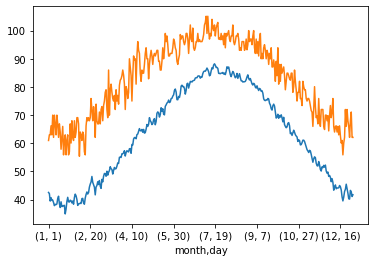

In [91]:
daily_max_avg.plot()
daily_max_max.plot()
plt.show()